In [10]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import ticker
import datetime as dt
import netCDF4 as nc
from scipy.interpolate import griddata

In [11]:
famb = "/short/w35/mm3972/cable/runs/EucFACE/EucFACE_run/outputs/gw_on/EucFACE_amb_out.nc"
fele = "/short/w35/mm3972/cable/runs/EucFACE/EucFACE_run/outputs/gw_on/EucFACE_ele_out.nc"

In [12]:
# Interpolate
date_start_cable = pd.datetime(2013,1,1) - pd.datetime(2011,12,31)
date_end_cable   = pd.datetime(2019,5,11) - pd.datetime(2011,12,31)
date_start_cable = date_start_cable.days
date_end_cable   = date_end_cable.days

In [28]:
amb = nc.Dataset(famb, 'r')

Time = nc.num2date(amb.variables['time'][:],amb.variables['time'].units)
SoilMoist_amb = pd.DataFrame(amb.variables['SoilMoist'][:,:,0,0], columns=[1.,4.5,10.,19.5,41,71,101,131,161,191,221,273.5,386])
SoilMoist_amb['dates'] = Time
SoilMoist_amb = SoilMoist_amb.set_index('dates')
SoilMoist_amb = SoilMoist_amb.resample("D").agg('mean')
SoilMoist_amb.index = SoilMoist_amb.index - pd.datetime(2011,12,31)
SoilMoist_amb.index = SoilMoist_amb.index.days
SoilMoist_amb = SoilMoist_amb.stack() # turn multi-columns into one-column
SoilMoist_amb = SoilMoist_amb.reset_index() # remove index 'dates'
SoilMoist_amb = SoilMoist_amb.rename(index=str, columns={"level_1": "Depth"})
SoilMoist_amb = SoilMoist_amb.sort_values(by=['Depth','dates'])
# rename columns level_1 to Depth
#SoilMoist = SoilMoist.set_index('Depth')

ntimes      = len(np.unique(SoilMoist_amb['dates']))
dates       = np.unique(SoilMoist_amb['dates'].values)

x_cable     = np.concatenate(( dates, SoilMoist_amb['dates'].values,dates)) # Time
y_cable     = np.concatenate(([0]*ntimes,SoilMoist_amb['Depth'].values,[460]*ntimes))# Depth
value_cable = np.concatenate(( SoilMoist_amb.iloc[:ntimes,2].values, \
                               SoilMoist_amb.iloc[:,2].values,         \
                               SoilMoist_amb.iloc[-(ntimes):,2].values ))
value_cable = value_cable*100.
# add the 12 depths to 0
X_cable     = np.arange(date_start_cable,date_end_cable,1)
Y_cable     = np.arange(0,465,5)
grid_X_cable, grid_Y_cable = np.meshgrid(X_cable,Y_cable)

# interpolate
grid_amb = griddata((x_cable, y_cable) , value_cable, (grid_X_cable, grid_Y_cable),\
             method='cubic')

(0.5, 2320.5, 0.5, 92.5)

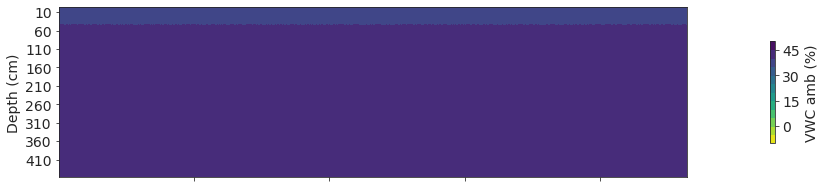

In [29]:
fig = plt.figure(figsize=[15,10])
fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.05)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

almost_black = '#262626'
# change the tick colors also to the almost black
plt.rcParams['ytick.color'] = almost_black
plt.rcParams['xtick.color'] = almost_black

# change the text colors also to the almost black
plt.rcParams['text.color'] = almost_black

# Change the default axis colors from black to a slightly lighter black,
# and a little thinner (0.5 instead of 1)
plt.rcParams['axes.edgecolor'] = almost_black
plt.rcParams['axes.labelcolor'] = almost_black

ax1 = fig.add_subplot(311) 

cmap = plt.cm.viridis_r
#######
#plt.imshow(amb_mean, cmap=cmap, vmin=0, vmax=40, origin="upper", interpolation='nearest')
#plt.show()
######
#img = ax1.imshow(grid_data, cmap=cmap, vmin=0, vmax=40, origin="upper", interpolation='nearest')
#'spline16')#'nearest')
levels = [-10,-5,0.,5,10,15,20,25,30,35,40,45,50]
img = ax1.contourf(grid_amb, cmap=cmap, origin="upper", levels=levels)
cbar = fig.colorbar(img, orientation="vertical", pad=0.1, shrink=.6) #"horizontal"
cbar.set_label('VWC amb (%)')
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

# every second tick
ax1.set_yticks(np.arange(len(Y_cable))[::10])
Y_labels = np.flipud(Y_cable)
ax1.set_yticklabels(Y_labels[::10])
plt.setp(ax1.get_xticklabels(), visible=False)

ax1.set_ylabel("Depth (cm)")
ax1.axis('tight')


In [30]:
ele = nc.Dataset(fele, 'r')

Time = nc.num2date(ele.variables['time'][:],ele.variables['time'].units)
SoilMoist_ele = pd.DataFrame(ele.variables['SoilMoist'][:,:,0,0], columns=[1.,4.5,10.,19.5,41,71,101,131,161,191,221,273.5,386])
SoilMoist_ele['dates'] = Time
SoilMoist_ele = SoilMoist_ele.set_index('dates')
SoilMoist_ele = SoilMoist_ele.resample("D").agg('mean')
SoilMoist_ele.index = SoilMoist_ele.index - pd.datetime(2011,12,31)
SoilMoist_ele.index = SoilMoist_ele.index.days
SoilMoist_ele = SoilMoist_ele.stack() # turn multi-columns into one-column
SoilMoist_ele = SoilMoist_ele.reset_index() # remove index 'dates'
SoilMoist_ele = SoilMoist_ele.rename(index=str, columns={"level_1": "Depth"})
SoilMoist_ele = SoilMoist_ele.sort_values(by=['Depth','dates'])

value_cable = np.concatenate(( SoilMoist_ele.iloc[:ntimes,2].values, \
                               SoilMoist_ele.iloc[:,2].values,         \
                               SoilMoist_ele.iloc[-(ntimes):,2].values ))
value_cable = value_cable*100.

# interpolate
grid_ele = griddata((x_cable, y_cable) , value_cable, (grid_X_cable, grid_Y_cable),\
             method='cubic')

In [31]:
ax2 = fig.add_subplot(312)

#img2 = ax2.imshow(grid_cable, cmap=cmap, vmin=0, vmax=40, origin="upper", interpolation='nearest')
#'spline16')#'nearest')

img2 = ax2.contourf(grid_ele, cmap=cmap, origin="upper", levels=levels) # vmin=0, vmax=40, 
cbar2 = fig.colorbar(img2, orientation="vertical", pad=0.1, shrink=.6)
cbar2.set_label('VWC ele (%)')#('Volumetric soil water content (%)')
tick_locator2 = ticker.MaxNLocator(nbins=5)
cbar2.locator = tick_locator2
cbar2.update_ticks()

# every second tick
ax2.set_yticks(np.arange(len(Y_cable))[::10])
Y_labels2 = np.flipud(Y_cable)
ax2.set_yticklabels(Y_labels2[::10])
plt.setp(ax2.get_xticklabels(), visible=False)

#ax2.set(xticks=xtickslocs2, xticklabels=cleaner_dates2)
ax2.set_ylabel("Depth (cm)")
ax2.axis('tight')

(0.5, 2320.5, 0.5, 92.5)

In [32]:
# ________________ plot difference _____________________
ax3 = fig.add_subplot(313)
difference = grid_ele -grid_amb

cmap = plt.cm.BrBG

#img3 = ax3.imshow(difference, cmap=cmap, vmin=-30, vmax=30, origin="upper", interpolation='nearest')
#'spline16')#'nearest')
levels = [-50,-40,-30,-20,-10,-5,0,5,10,20,30,40,50]
img3 = ax3.contourf(difference, cmap=cmap,origin="upper", levels=levels)
cbar3 = fig.colorbar(img3, orientation="vertical", pad=0.1, shrink=.6)
cbar3.set_label('ele - amb (%)')
tick_locator3 = ticker.MaxNLocator(nbins=6)
cbar3.locator = tick_locator3
cbar3.update_ticks()

# every second tick
ax3.set_yticks(np.arange(len(Y_cable))[::10])
Y_labels3 = np.flipud(Y_cable)
ax3.set_yticklabels(Y_labels3[::10])

ax3.set_xticks(np.arange(len(X_cable)))
cleaner_dates3 = X_cable
ax3.set_xticklabels(cleaner_dates3)

cleaner_dates3 = ["2014","2015","2016","2017","2018","2019"]
              # ["2013-01","2014-01","2015-01","2016-01",]
xtickslocs3 = [365,730,1095,1461,1826,2191]

ax3.set(xticks=xtickslocs3, xticklabels=cleaner_dates3)
ax3.set_ylabel("Depth (cm)")
ax3.axis('tight')

fig.savefig("EucFACE_SW_cable_gw_on_amb_vs_ele_contour.pdf", bbox_inches='tight', pad_inches=0.1)